In [1]:
import sys
import re
import numpy as np
import matplotlib.pyplot as plot
import scipy as scp
from scipy import optimize
from scipy import stats
plot.rcParams.update({'font.size': 20})
import pandas as pd
import statistics

In [2]:
VZ = (15*np.pi*(3.93/2)**2) #Volumen Zylinder
LZ = VZ/1000 #Liter zylinder

mes = [0,2,3,4,5,10,15,20,30,45,60,181]
E = []
t = []
c = 0


for m in mes:
    f = open("{0}ml.lab".format(m))
    t.append([])
    E.append([])


    for _ in range(23):
        f.readline()
    while True:
        s = f.readline()
        try:
            s_arr = re.split('\t',s)
            t[c].append(float(s_arr[1]))
            E[c].append(float(s_arr[2]))
        except:
            break
    c += 1
    
# Messwerte Bereinigen
Eco2 = []
tco2 = []
Eo2= []
to2 = []

medsco2 = []
medso2 = []

Iavg = []
I0avg = []

for e in E:
    minCut = 0
    maxCut = 0
    presMinCut = 0
    presMaxCut = 0
    
    
    #find minimum area for Co2 curve
    for i in range(100,len(e)):
        if abs(min(e) - e[i])<0.1:
            minCut = i
            break
    for i in range(minCut,len(e)):
        if abs(min(e) - e[i])>0.1:
            maxCut = i
            break
    if maxCut == 0:
        maxCut = len(e)
    
    median = statistics.median(e[minCut:maxCut])
    medsco2.append(median)
    for i in range(minCut,maxCut):
        if abs(median-e[i])<0.025:
            presMinCut = i
            break
    for i in range(presMinCut+100,maxCut):
        if abs(median-e[i])>0.025:
            presMaxCut = i
            break
    if presMaxCut == 0:
        presMaxCut = maxCut
    
    
    s = 0
    for i in range(presMinCut,presMaxCut,1):
        s += e[i]
    s = s/(presMaxCut-presMinCut)
    #print(presMinCut,presMaxCut,s)
    
    Iavg.append(s)
    
    Eco2.append(e[presMinCut:presMaxCut])
    tco2.append(t[0][presMinCut:presMaxCut])
    
    
    
    #find maximum area for o2 curve
    for i in range(0,len(e)):
        if abs(max(e) - e[i])<0.1:
            minCut = i
            break
    for i in range(minCut,len(e)):
        if abs(max(e) - e[i])>0.1:
            maxCut = i
            break
    if maxCut == 0:
        maxCut = len(e)
    
    median = statistics.median(e[minCut:maxCut])
    medso2.append(median)
    for i in range(minCut,maxCut):
        if abs(median-e[i])<0.025:
            presMinCut = i
            break
    for i in range(presMinCut+50,maxCut):
        if abs(median-e[i])>0.025:
            presMaxCut = i
            break
    if presMaxCut == 0:
        presMaxCut = maxCut
        
    s = 0
    for i in range(presMinCut,presMaxCut,1):
        s += e[i]
    s = s/(presMaxCut-presMinCut)
    #print(presMinCut,presMaxCut,s)
    
    I0avg.append(s)
    
    Eo2.append(e[presMinCut:presMaxCut])
    to2.append(t[0][presMinCut:presMaxCut])


In [3]:
for i in range(len(mes)):
    print(len(t[i]))

2866
1602
838
1629
1677
2061
1093
1003
1459
1227
1450
1359


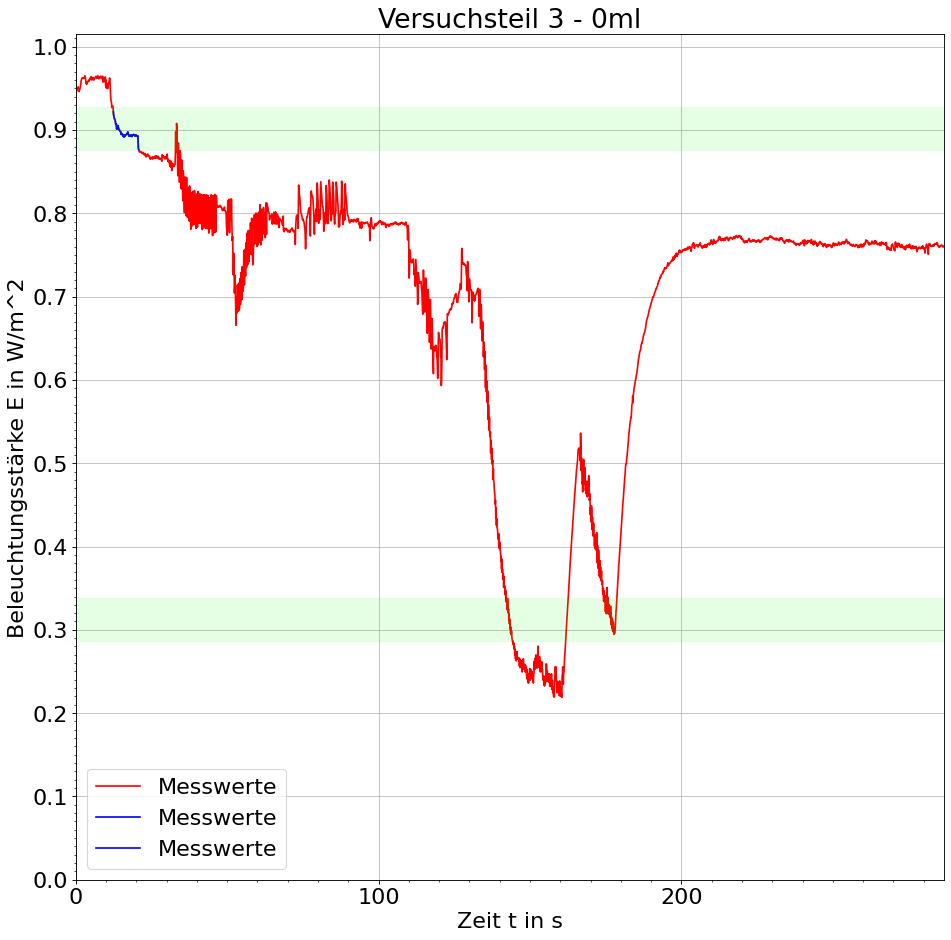

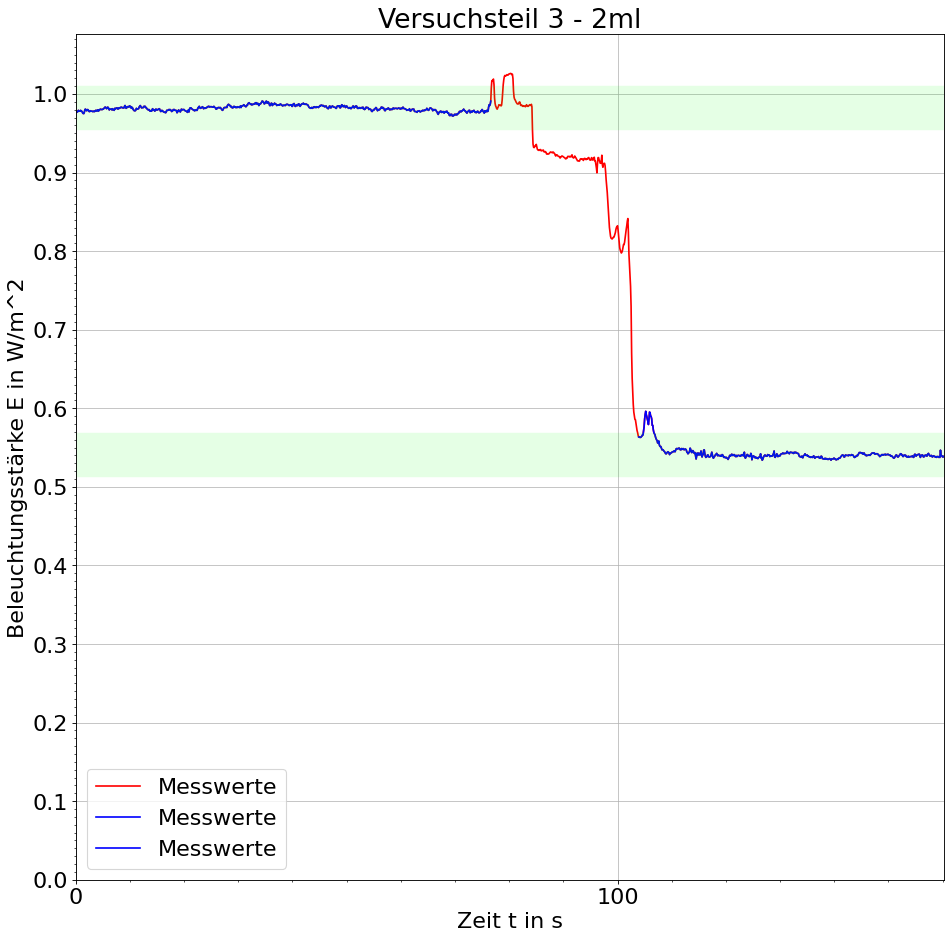

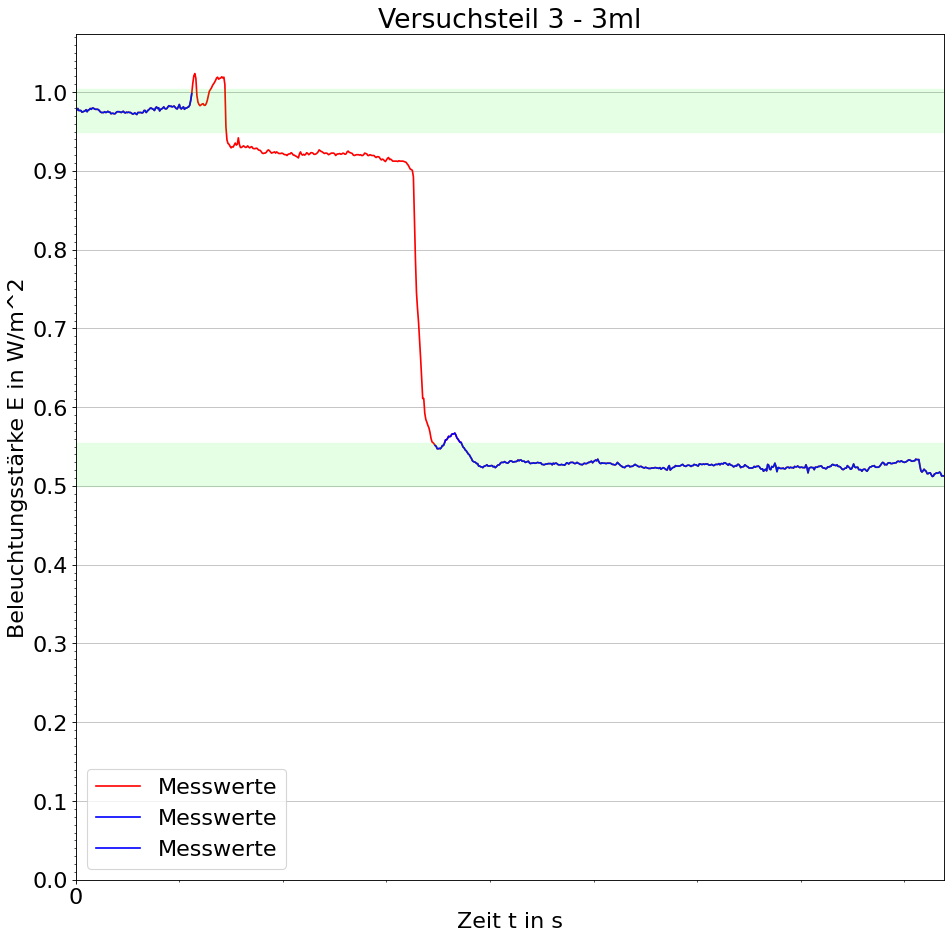

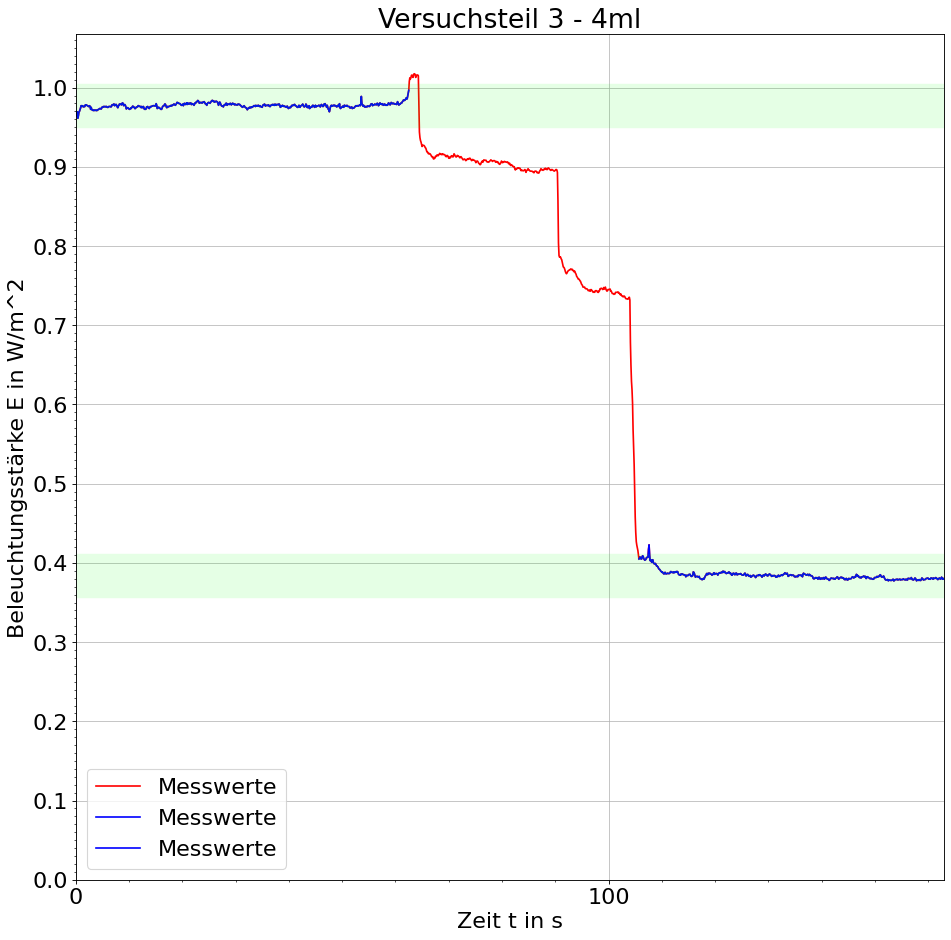

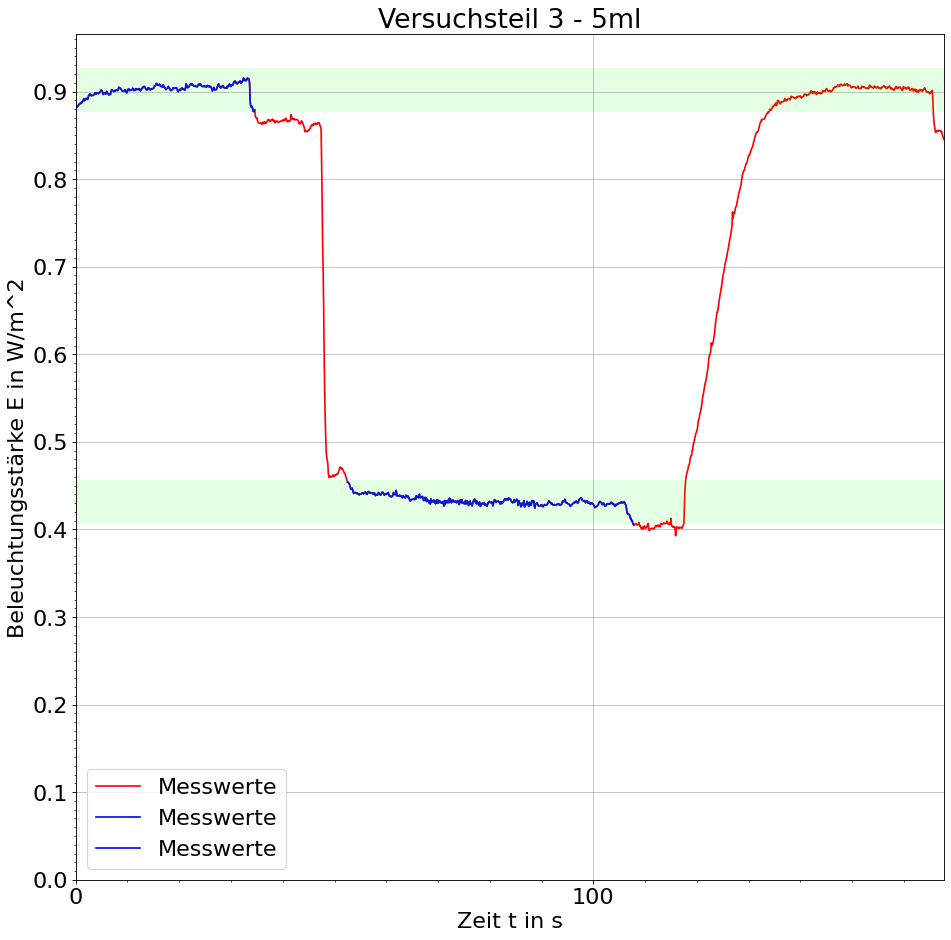

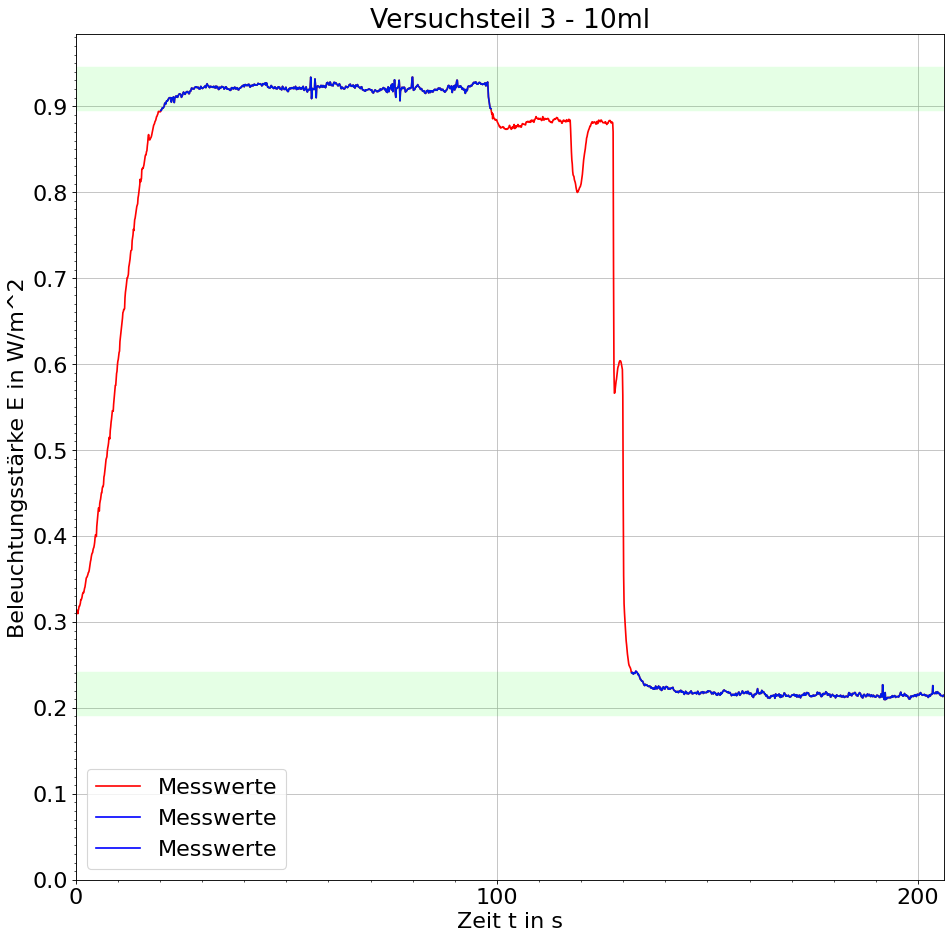

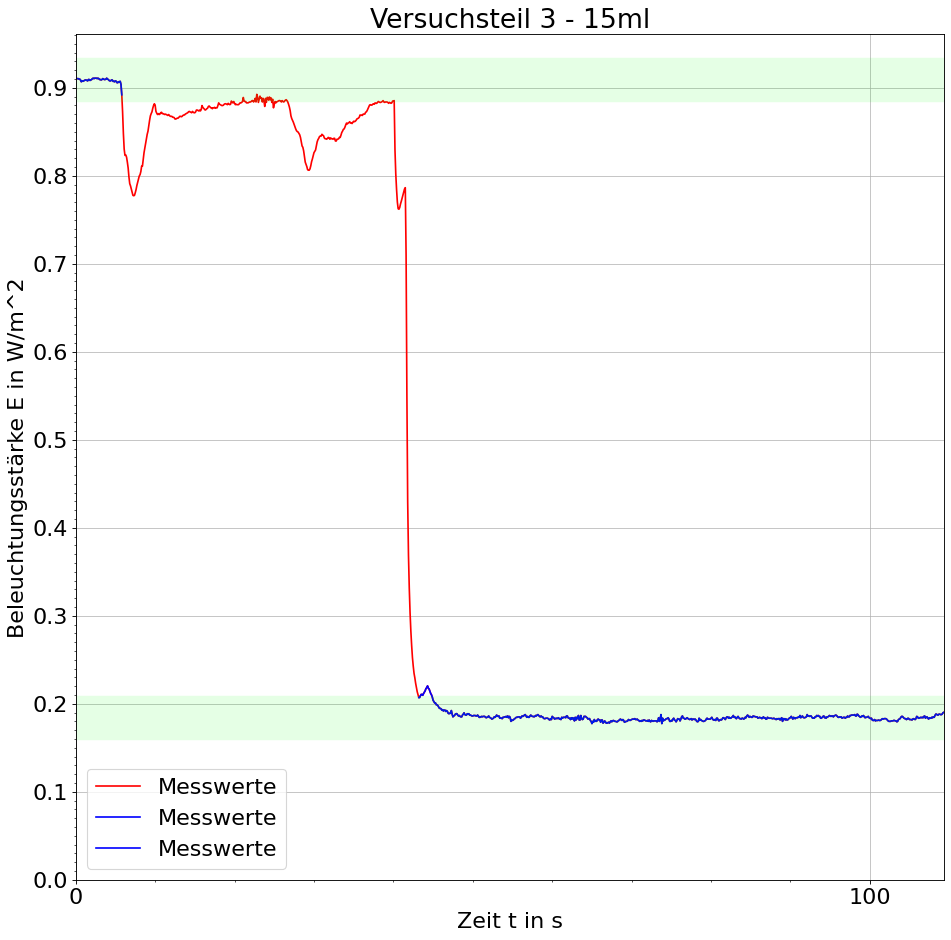

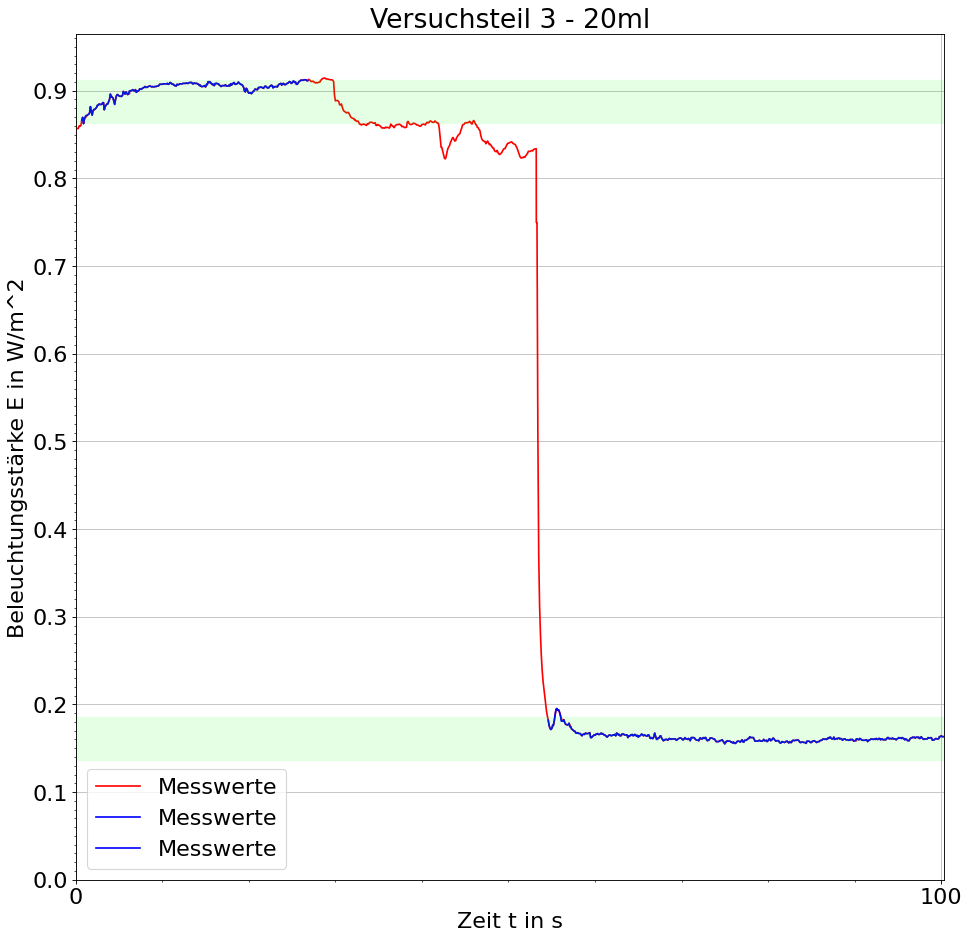

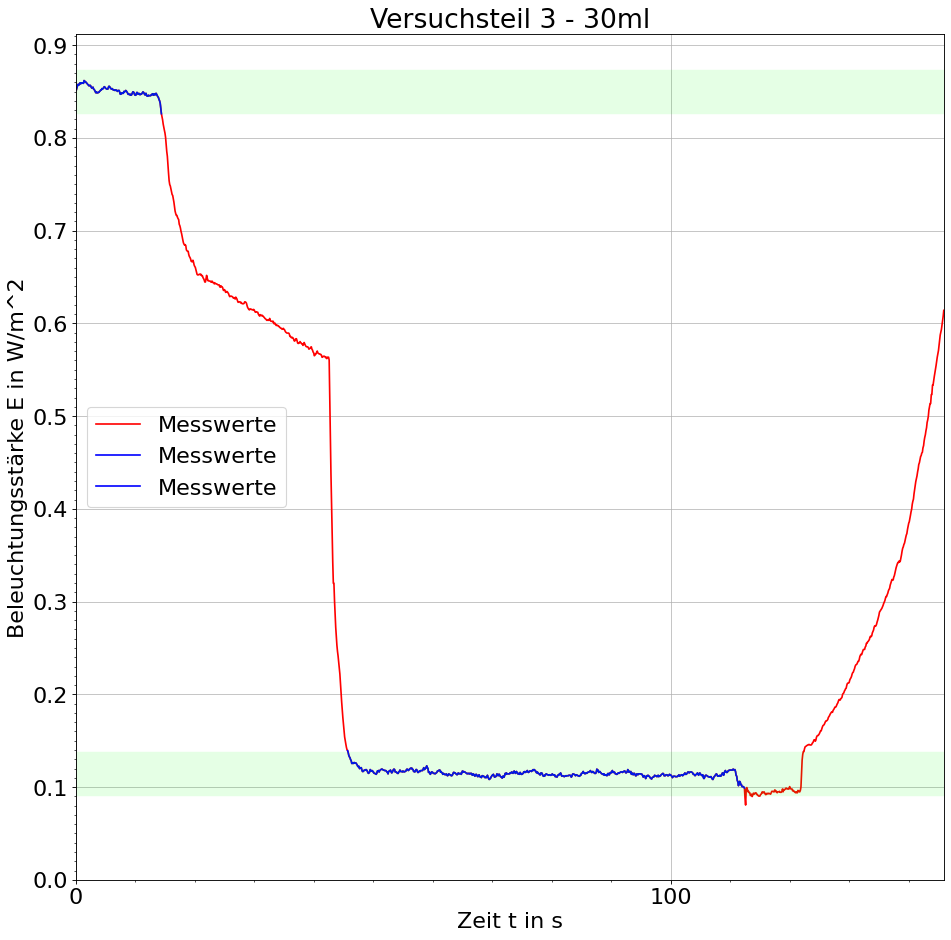

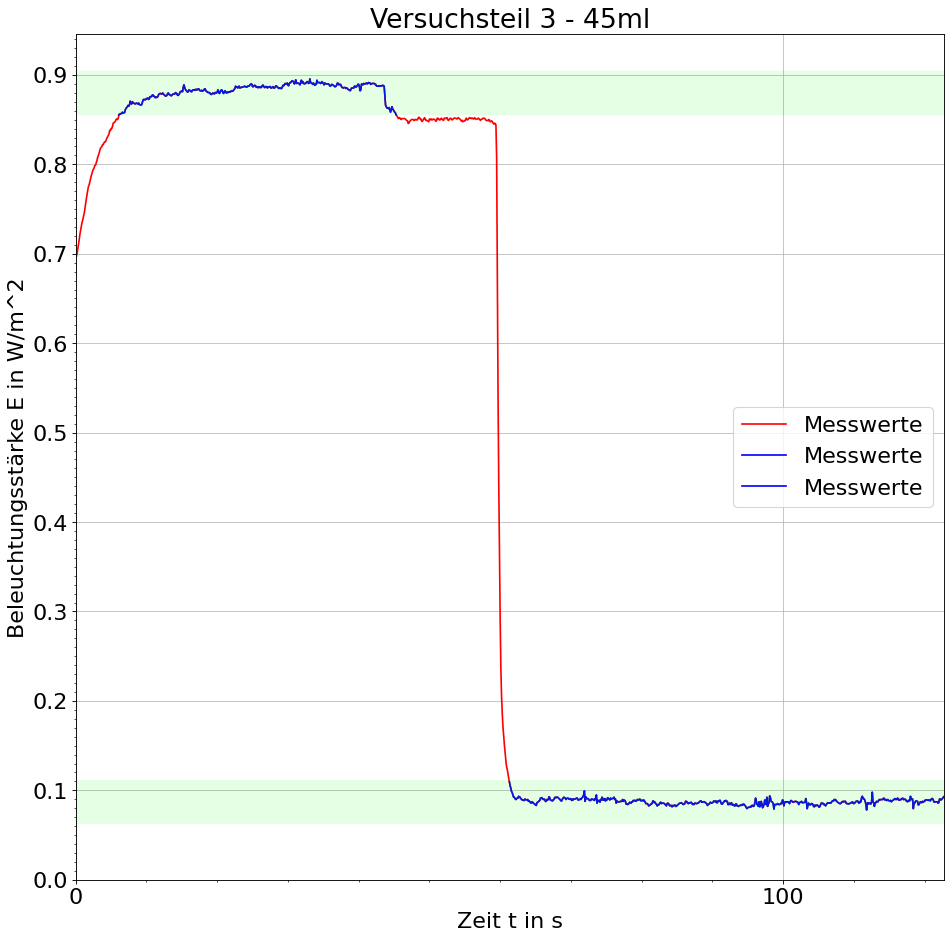

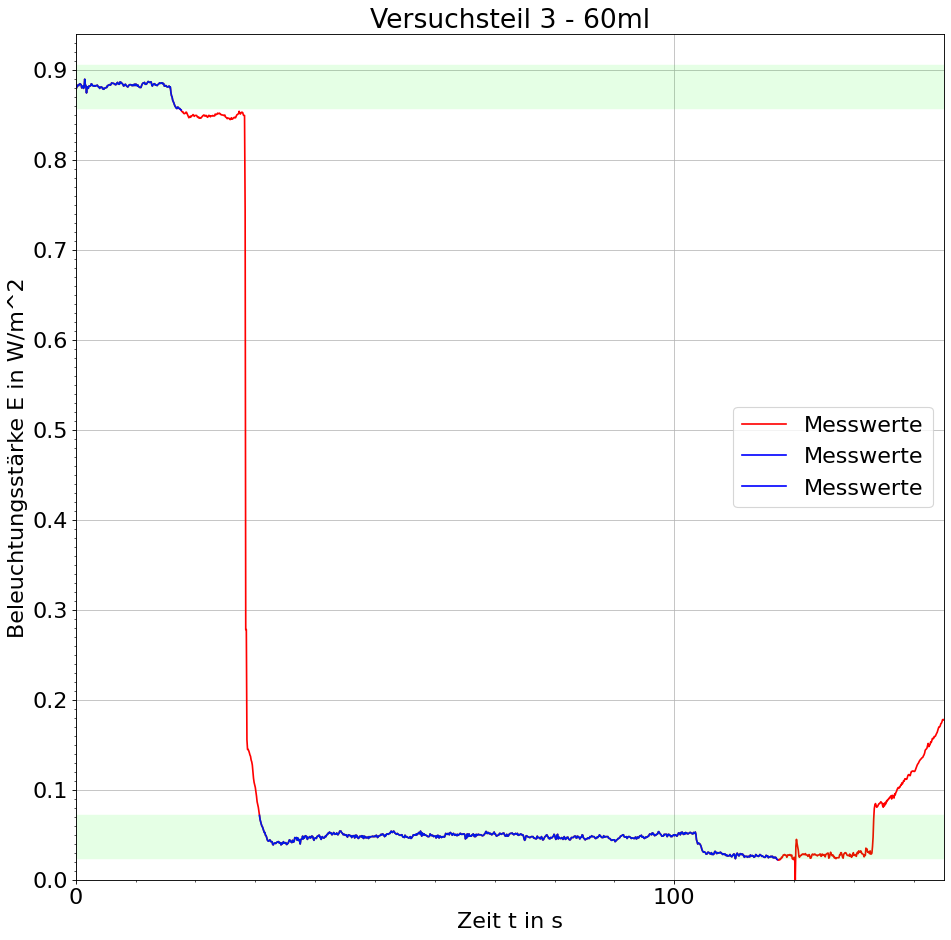

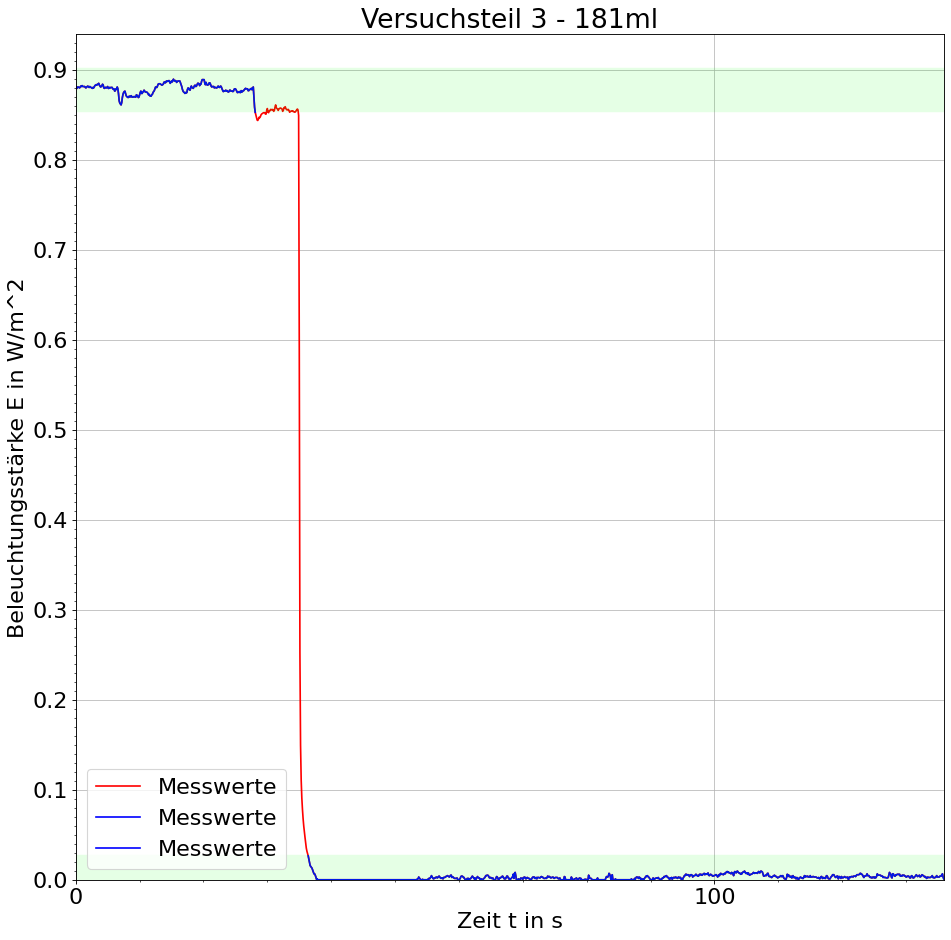

In [4]:
for i in range(len(E)):
    ind = i
    fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(14, 14), dpi=80)

    x_min = 0
    x_max = len(t[ind])/10
    y_min = 0
    y_max = max(E[ind])+0.05

    ax=axs
    #Settings
    ax.set_title('Versuchsteil 3 - {0}ml'.format(mes[ind]))

    ax.plot(t[ind],E[ind], label="Messwerte", color="red")
    
    ax.plot(tco2[ind],Eco2[ind], label="Messwerte", color="blue")
    ax.plot([0,t[ind][-1]],[medsco2[ind],medsco2[ind]],linewidth=40, color="lime",alpha=0.1)
    
    ax.plot(to2[ind],Eo2[ind], label="Messwerte", color="blue")
    ax.plot([0,t[ind][-1]],[medso2[ind],medso2[ind]],linewidth=40, color="lime",alpha=0.1)
    
    #ax.plot([0,t[ind][-1]],[meds[ind]+0.025,meds[ind]+0.025], color="green", alpha=0.3)

    ax.set_xlabel("Zeit t in s")
    ax.set_ylabel("Beleuchtungsstärke E in W/m^2")

    #Grid Setting
    major_ticks = np.arange(x_min, x_max, 100)
    minor_ticks = np.arange(x_min, x_max, 10)
    major_ticks_y = np.arange(y_min, y_max, 0.1)
    minor_ticks_y = np.arange(y_min, y_max, 0.01)

    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)

    ax.grid(which='minor', alpha=0.55)
    ax.grid(which='major', alpha=0.8)

    ax.grid(which='both')
    plot.grid()
    plot.legend()
    plot.savefig("KonzPlot{0}ml.png".format(mes[ind]))

In [5]:
Iavg[0] = I0avg[0]

relTrans = []
konz = []

for i in range(len(Iavg)):
    relTrans.append(Iavg[i]/I0avg[i])
    
    LZ = 15*np.pi*(3.93/2)**2/1000
    #LC = 2 #milliLiter co2
    konz.append(mes[i]/1000/LZ*100)
    

In [39]:
konz[11]

99.47463028661649

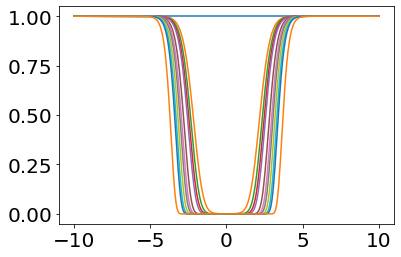

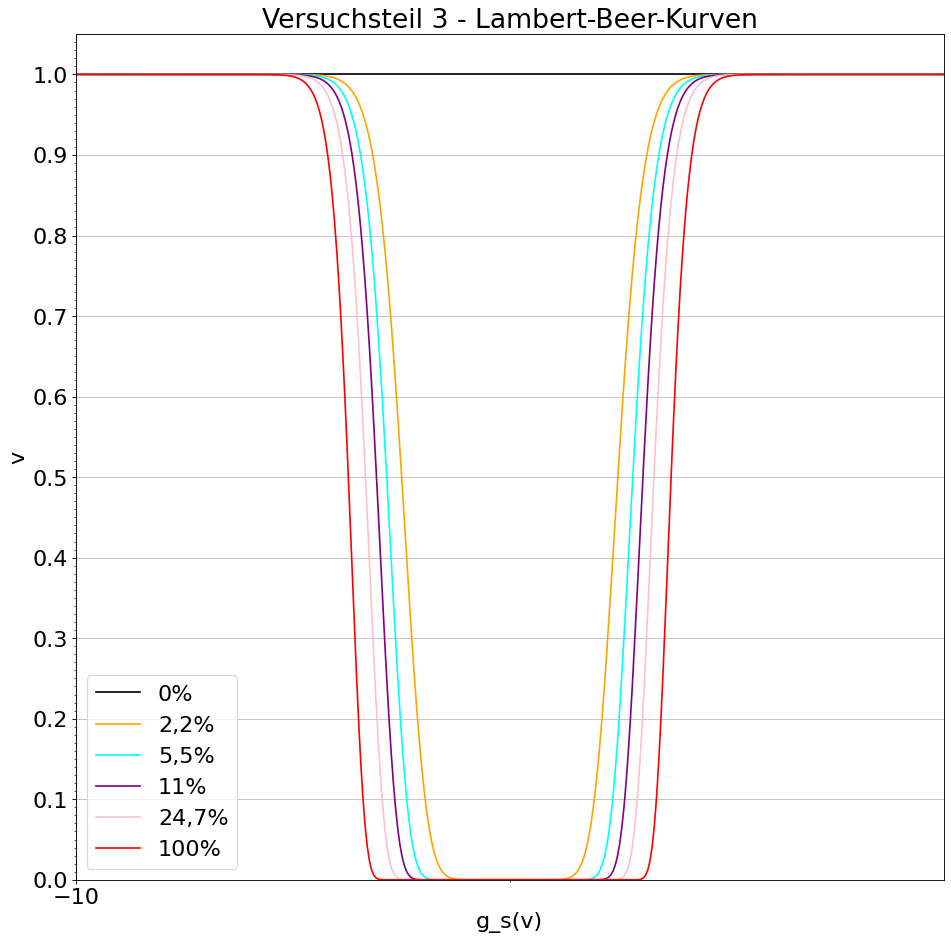

In [44]:
def func(v,b,c):
    return np.exp(-c*b*np.exp(-(v)**2/(2)))

yvs = []
for c in konz:
    yv = []
    vs = np.linspace(-10,10,400)
    for v in vs:
        yv.append(func(v,7,c))
    
    yvs.append(yv)
    plot.plot(vs,yv)

ints = []
for yv in yvs:
    s = 0
    for y in yv:
        s += y
    ints.append(s*0.05)

fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(14, 14), dpi=80)

x_min = -10
x_max = 10
y_min = 0
y_max = 1.05

ax=axs
#Settings
ax.set_title('Versuchsteil 3 - Lambert-Beer-Kurven'.format(mes[ind]))

ax.plot(vs,yvs[0], label="0%", color="black")
ax.plot(vs,yvs[3], label="2,2%", color="orange")
ax.plot(vs,yvs[5], label="5,5%", color="cyan")
ax.plot(vs,yvs[7], label="11%", color="purple")
ax.plot(vs,yvs[9], label="24,7%", color="pink")
ax.plot(vs,yvs[11], label="100%", color="red")


ax.set_xlabel("g_s(v)")
ax.set_ylabel("v")

#Grid Setting
major_ticks = np.arange(x_min, x_max, 100)
minor_ticks = np.arange(x_min, x_max, 10)
major_ticks_y = np.arange(y_min, y_max, 0.1)
minor_ticks_y = np.arange(y_min, y_max, 0.01)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

ax.grid(which='minor', alpha=0.55)
ax.grid(which='major', alpha=0.8)

ax.grid(which='both')
plot.grid()
plot.legend()
plot.savefig("LambertBeer.png")

In [30]:
len(konz)

12

In [7]:
offset = relTrans[-1]
faktor = 1-offset

test = []
for i in ints:
    trel = faktor*(i-ints[-1])/(ints[0]-ints[-1])
    test.append(trel+offset)

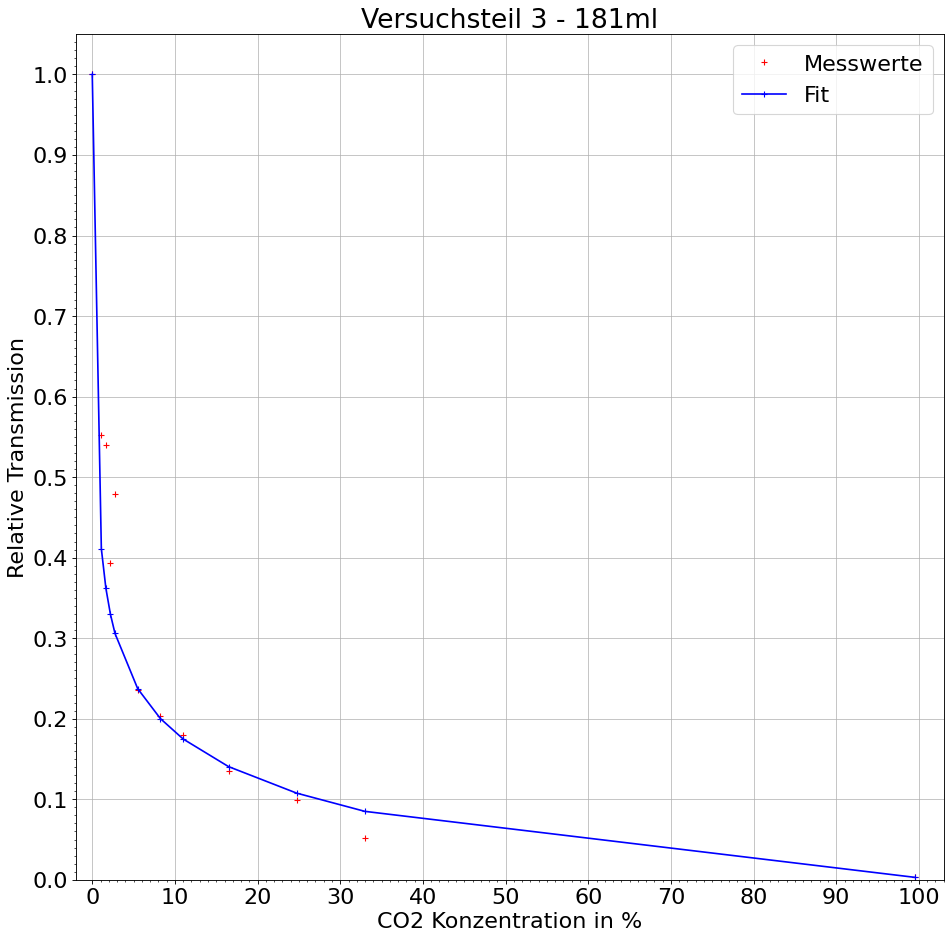

In [8]:
fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(14, 14), dpi=80)

x_min = -2
x_max = 102
y_min = 0
y_max = 1.05

ax=axs
#Settings
ax.set_title('Versuchsteil 3 - {0}ml'.format(mes[ind]))

ax.plot(konz,relTrans, label="Messwerte",marker="+",linestyle=" ", color="red")
ax.plot(konz,test, label="Fit",marker="+",linestyle="-", color="blue")

ax.set_xlabel("CO2 Konzentration in %")
ax.set_ylabel("Relative Transmission")

#Grid Setting
major_ticks = np.arange(x_min+2, x_max+2, 10)
minor_ticks = np.arange(x_min+2, x_max+2, 1)
major_ticks_y = np.arange(y_min, y_max, 0.1)
minor_ticks_y = np.arange(y_min, y_max, 0.01)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

ax.grid(which='minor', alpha=0.55)
ax.grid(which='major', alpha=0.8)

ax.grid(which='both')
plot.grid()
plot.legend()
plot.savefig("KonzPlot.png")

In [9]:
s = 0
for i in range(len(Iavg)):
    s+=I0avg[i]
m = s/len(Iavg)

In [10]:
s = 0
for i in range(len(Iavg)):
    s+=abs(I0avg[i]-m)
print(s/np.sqrt(len(Iavg)))

0.11777017284071688


In [11]:
relTrans

[1.0,
 0.5529007133472074,
 0.540031107208347,
 0.3932592773445897,
 0.4794535080937106,
 0.23591908325617506,
 0.20344623921734456,
 0.17998020248209823,
 0.13490559525937484,
 0.09900580416021929,
 0.051409560295011356,
 0.003059502137086287]

In [12]:
a = ints[-1]
b = ints[0]

In [22]:
def func(v,b,c):
    return np.exp(-c*b*np.exp(-(v)**2/(2)))

yvs = []
c = 0.115
yv = []
vs = np.linspace(-10,10,400)
for v in vs:
    yv.append(func(v,7,c))
    
yvs.append(yv)

ints = []
for yv in yvs:
    s = 0
    for y in yv:
        s += y
    ints.append(s*0.05)
print(ints)

test = []
for i in ints:
    trel = faktor*(i-a)/(b-a)
    test.append(trel+offset)
    
print(test)

[18.453633316410027]
[0.79448430716111]


In [28]:
def func(v,b,c):
    return np.exp(-c*b*np.exp(-(v)**2/(2)))

yvs = []
c = 0.008
yv = []
vs = np.linspace(-10,10,400)
for v in vs:
    yv.append(func(v,7,c))
    
yvs.append(yv)

ints = []
for yv in yvs:
    s = 0
    for y in yv:
        s += y
    ints.append(s*0.05)
print(ints)

test = []
for i in ints:
    trel = faktor*(i-a)/(b-a)
    test.append(trel+offset)
    
print(test)

[19.862710258641197]
[0.9817538772566392]
